In [92]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import StratifiedKFold

In [93]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [94]:
podcasts_segments = np.load('dataset_x.npy')
ads_segments = np.load('dataset_y.npy')

In [95]:
def get_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 10, 1)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    #model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))


    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics='accuracy')

    return model

In [96]:
def get_evaluation(model, X_train, X_test, y_train, y_test):
    history = model.fit(X_train,y_train,epochs=20)
    return history, model.evaluate(X_test, y_test)

In [97]:
history_arr = []

for train_index, test_index in kfold.split(np.array(podcasts_segments), np.array(ads_segments)):
    X_train, X_test, y_train, y_test = np.array(podcasts_segments)[train_index], np.array(podcasts_segments)[test_index], \
                                        np.array(ads_segments)[train_index], np.array(ads_segments)[test_index]
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
    
    history, training = get_evaluation(get_model(),X_train,X_test,y_train,y_test)

    history_arr.append(training)

    

ValueError: Found input variables with inconsistent numbers of samples: [2922, 217835]

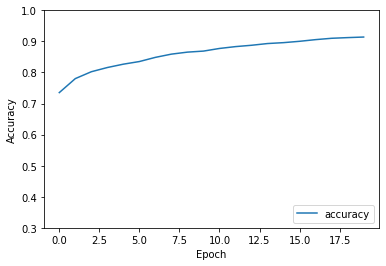

In [ ]:
history_arr

plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

KeyError: 'val_accuracy'

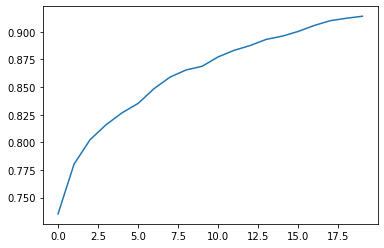

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)